# ***Задание 4.***

---





# **Многомерная регрессия**
 **Цель работы**: Изучение принципов решения задачи многомерной
регрессии с использованием методов машинного обучения.

Набор данных позволяет найти зависимость показателя смертности населения
ЮАР от различных критериев. Датасет содержит 60 строк данных и 17 признаков.

Атрибуты:
* I – индекс;
* А1 – среднегодовое количество осадков в дюймах;
* А2 – средняя температура января в градусах по Фаренгейту;
* АЗ – средняя температура июля в градусах по Фаренгейту;
* А4 – процент населения в возрасте 65 лет и старше в 1960 году;
* А5 – количество членов домохозяйств в 1960 году;
* А6 – количество лет школьного образования для лиц старше 22 лет;
* А7 – количество домохозяйств с полностью оборудованными кухнями;
* А8 – численность населения на кв. милю в урбанизированных районах;
* А9 – процент небелого населения;
* А10 – процент офисных работников;
* А11 — количество семей с доходом менее 3000 долларов;
* А12 – индекс загрязнения углеводородами;
* А13 – индекс загрязнения оксидом азота;
* А14 – индекс загрязнения диоксидом серы;
* А15 – процентная относительная влажность воздуха в среднем за год в 13:00;
* В – уровень смертности.

# *1. Импортируйте необходимые библиотеки*

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# *2. Получить представление о наборе данных*

In [52]:
df=pd.read_csv('x28.csv')
df.shape


(60, 17)

In [53]:
df.head()

,Number,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,B
0,1,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59,921.870
1,2,35,23,72,11.1,3.14,11.0,78.8,4281,3.6,50.7,14.4,8,10,39,57,997.875
2,3,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54,962.354
3,4,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56,982.291
4,5,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55,1071.289


In [54]:
df.describe()

,Number,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,B
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,37.366667,34.816667,74.600000,8.798333,3.263167,10.973333,80.913333,3876.050000,11.873333,46.073333,14.373333,37.850000,22.516667,53.766667,57.533333,940.358433
std,17.464249,9.984678,11.975245,4.766408,1.464552,0.135252,0.845299,5.141373,1454.102361,8.919886,4.626851,4.160096,91.977673,46.358402,63.390468,5.460076,62.206278
min,1.000000,10.000000,12.000000,63.000000,5.600000,2.920000,9.000000,66.800000,1441.000000,0.800000,33.800000,9.400000,1.000000,1.000000,1.000000,38.000000,790.733000
25%,15.750000,32.750000,27.000000,72.000000,7.675000,3.210000,10.400000,78.375000,3104.250000,4.950000,43.250000,12.000000,7.000000,4.000000,11.000000,54.750000,898.372000
50%,30.500000,38.000000,31.500000,74.000000,9.000000,3.265000,11.050000,81.150000,3567.000000,10.400000,45.500000,13.200000,14.500000,9.000000,30.000000,57.000000,943.683000
75%,45.250000,43.250000,40.000000,77.250000,9.700000,3.360000,11.500000,83.600000,4519.750000,15.650000,49.525000,15.150000,30.250000,23.750000,69.000000,60.000000,983.205750
max,60.000000,60.000000,83.000000,85.000000,11.800000,3.530000,12.300000,90.700000,9699.000000,38.500000,59.700000,26.400000,648.000000,319.000000,278.000000,73.000000,1113.156000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Number  60 non-null     int64  
 1   A1      60 non-null     int64  
 2   A2      60 non-null     int64  
 3   A3      60 non-null     int64  
 4   A4      60 non-null     float64
 5   A5      60 non-null     float64
 6   A6      60 non-null     float64
 7   A7      60 non-null     float64
 8   A8      60 non-null     int64  
 9   A9      60 non-null     float64
 10  A10     60 non-null     float64
 11  A11     60 non-null     float64
 12  A12     60 non-null     int64  
 13  A13     60 non-null     int64  
 14  A14     60 non-null     int64  
 15  A15     60 non-null     int64  
 16  B       60 non-null     float64
dtypes: float64(8), int64(9)
memory usage: 8.1 KB


# *3. Разведочный анализ.*

In [56]:
# Проверяем наличие пропущенных значений
df.isnull().sum()

,0
Number,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0


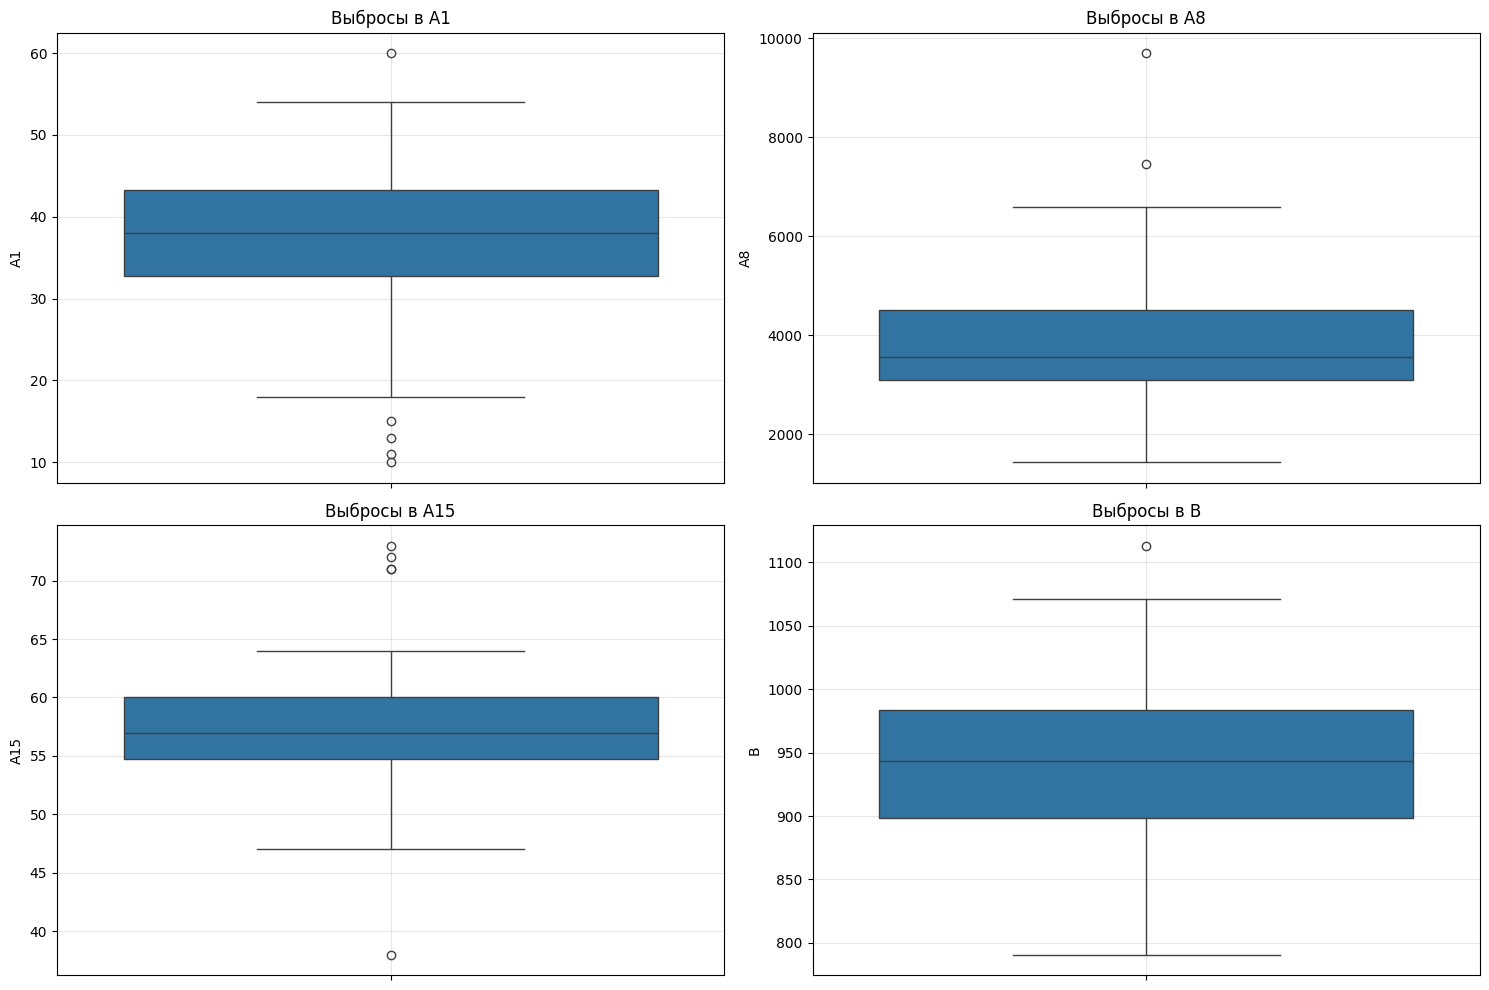

In [57]:
# Визуализация выбросов для нескольких признаков
key_features = ['A1', 'A8', 'A15', 'B']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Выбросы в {feature}')
    plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

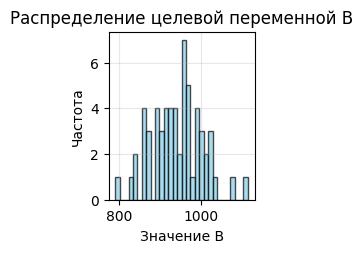

In [58]:
# Распределение целевой переменной
plt.subplot(2, 3, 1)
plt.hist(df['B'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Значение B')
plt.ylabel('Частота')
plt.title('Распределение целевой переменной B')
plt.grid(alpha=0.3)

# *4. Выводы о влиянии различных признаков на класс.*

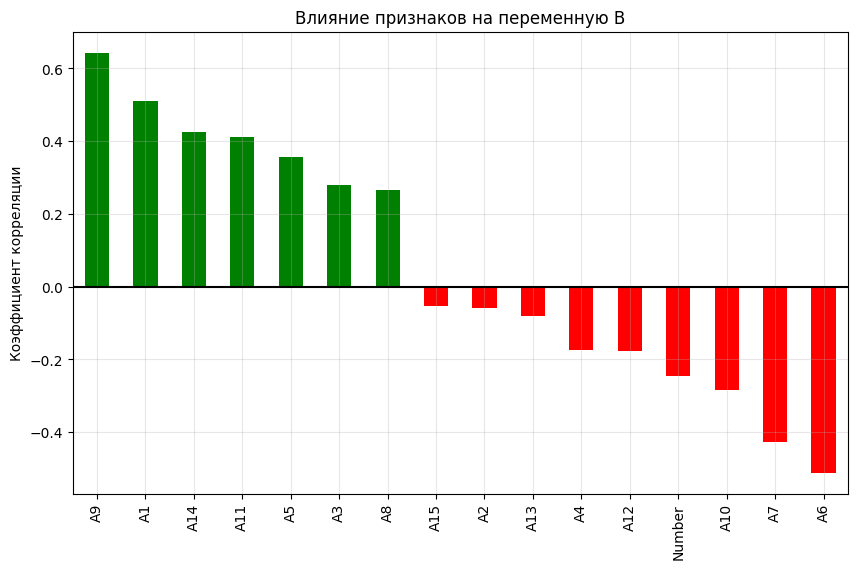

In [59]:
# Анализ корреляций
corr = df.corr()
corr_with_B = corr['B'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
corr_with_B.drop('B').plot(kind='bar', color=['red' if x < 0 else 'green' for x in corr_with_B.drop('B')])
plt.title('Влияние признаков на переменную B')
plt.ylabel('Коэффициент корреляции')
plt.axhline(y=0, color='black', linestyle='-')
plt.grid(True, alpha=0.3)
plt.show()

Наибольшее положительное влияние имеют признаки A9,A1, A14, A11; отрицательное - А6, А5.

# *5. Предобработка данных*

In [60]:
# Применяем операцию нормализации
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_normalized

array([[-1.70341990e+00, -1.38031491e-01, -7.61659593e-01,
        -4.80847773e-01,  5.72867978e-01,  5.09011711e-01,
         1.15069946e-01, -4.39028438e-01, -3.47456143e-01,
        -7.57025584e-01, -6.48036430e-01, -1.84742623e-01,
         8.32537990e-02],
       [-1.64567685e+00, -2.39030142e-01, -5.50087484e-01,
         1.58484672e+00, -9.18328494e-01,  3.18132319e-02,
        -4.14513329e-01,  2.80838111e-01, -9.35342893e-01,
         1.00839876e+00,  6.46420379e-03, -3.27274024e-01,
        -2.34913586e-01],
       [-1.58793380e+00,  6.69957723e-01, -1.26943266e-01,
         1.10285134e+00, -3.96409729e-01, -1.39978220e+00,
         1.34684142e-01,  2.66274337e-01, -1.25189730e+00,
        -1.45447718e+00, -4.78351081e-01, -3.49201931e-01,
        -3.30363801e-01],
       [-1.53019075e+00,  9.72953678e-01,  9.30917280e-01,
        -1.58255150e+00,  1.09478674e+00,  1.51112852e-01,
        -6.69497869e-01, -5.20862979e-01,  1.72145300e+00,
         8.99421951e-01,  1.50939159e

In [61]:
# Разделяем на признаки и целевую переменную
df_copy = df.copy()
X = df_copy.drop('B', axis=1)
y = df_copy['B']

In [62]:
# Убедимся что данные в нужном формате
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [63]:
weak_cols = []
for col in X.columns:
    if abs(X[col].corr(y)) < 0.1:
        weak_cols.append(col)

X = X.drop(weak_cols, axis=1)

In [64]:
# Посмотрим на признаки
X.head()

,Number,A1,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A14
0,1,36,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,59
1,2,35,72,11.1,3.14,11.0,78.8,4281,3.6,50.7,14.4,8,39
2,3,44,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,33
3,4,47,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,24
4,5,43,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,206


Удалили слабо коррелирующие признаки(А2, А13, А15).

# *6. Разбить обработанный набор данных на обучающую и тестовую выборки*

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25, random_state=0)

75% данных для обучения, 25% для тестирования

In [66]:
# Масштабируем признаки обучающей выборки
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

# *7. Произвести обучение модели линейной регрессии*

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train_scaled, y_train)
model

LinearRegression()

In [68]:
X_test_scaled=scaler.transform(X_test)

# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test_scaled)

# Выведем первые пять значений
y_pred[:5]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 912.91713226,  935.55123289,  951.12414177,  783.89490805,
       1024.37500452])

In [69]:
# Импортируем метрики для оценки модели
from sklearn.metrics import root_mean_squared_error, r2_score
# Сравним тестовые и прогнозные значения
print('Root Mean Squared Error (RMSE):', root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 36.75866827038666


In [70]:
# Оцениваем качество модели с помощью R2
print('R2:', np.round(r2_score(y_test, y_pred), 2))

R2: 0.61


In [71]:
# Оцениваем R² через встроенный метод модели
print('R2 (score method):', model.score(X_test_scaled, y_test))

R2 (score method): 0.6060133402519219


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [72]:
# Выводим коэффициенты модели (веса признаков)
print('Coefficients:', np.round(model.coef_, 2))

Coefficients: [ -0.97  11.73 -18.04  -1.46  -6.32  -7.23 -14.87  11.99  43.43  -3.32
  -9.85 -10.64  13.11]


In [73]:
# Выводим свободный член
print('Intercept:', np.round(model.intercept_, 2))

Intercept: 936.57


# *8. Отобразить корректность работы модели на тестовой и обучающей выборках*

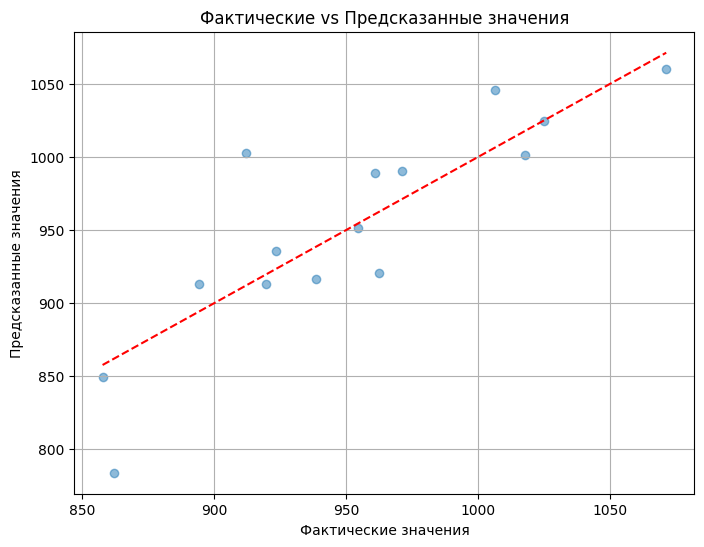

In [74]:
# Визуализация результатов регрессии

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные значения")
plt.grid()
plt.show()

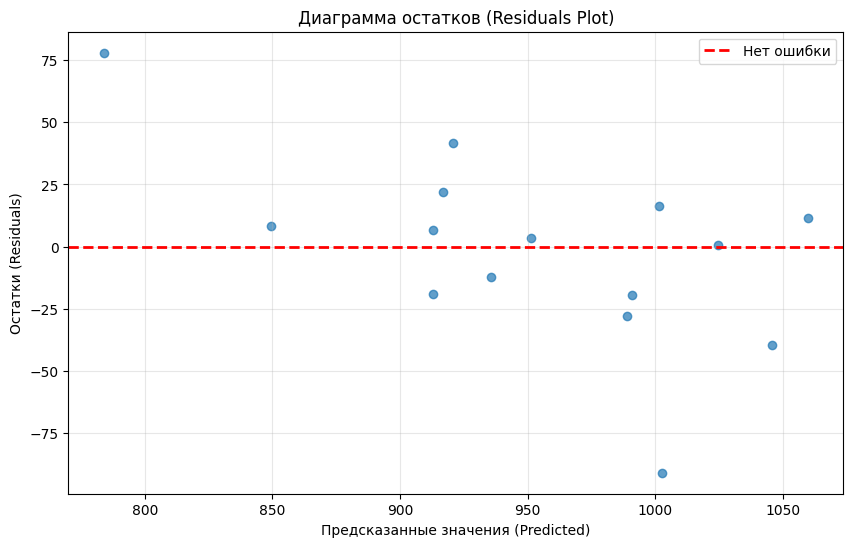

In [75]:
# Остатки регрессии (Residuals Plot)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Нет ошибки')
plt.xlabel('Предсказанные значения (Predicted)')
plt.ylabel('Остатки (Residuals)')
plt.title('Диаграмма остатков (Residuals Plot)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Результат:

- Хорошо: Остатки беспорядочно разбросаны вокруг горизонтальной красной линии (нуля), нет никаких явных дуг, форм или конусов.